[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Object Detection on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
# 내 컴퓨터의 nvidia 그래픽 드라이버 정보 확인
!nvidia-smi

Tue Aug  5 22:32:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:41:00.0  On |                  Off |
| 57%   50C    P2             62W /  450W |    1837MiB /  24564MiB |     10%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
# 현재 작업 디렉토리 HOME으로 지정
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [ ]:
%pip install ultralytics supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 43.3/112.6 GB disk)


In [ ]:
# !mkdir {HOME}/datasets
# %cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("food-detection-d7q6o").project("food-ingredients-detection-6ce7j")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FOOD-INGREDIENTS-detection-1 in yolov8:: 100%|██████████| 48116/48116 [00:14<00:00, 3417.99it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo12s.pt data=/home/park/datasets/FOOD-INGREDIENTS-detection-1/data.yaml epochs=400 imgsz=640 plots=True batch=40 cache=True

/home/park/datasets
Ultralytics 8.3.174 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 23994MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=40, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/park/datasets/FOOD-INGREDIENTS-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=400, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True,

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/detect/train/

BoxF1_curve.png			 labels_correlogram.jpg  train_batch216452.jpg
BoxPR_curve.png			 results.csv		 val_batch0_labels.jpg
BoxP_curve.png			 results.png		 val_batch0_pred.jpg
BoxR_curve.png			 train_batch0.jpg	 val_batch1_labels.jpg
args.yaml			 train_batch1.jpg	 val_batch1_pred.jpg
confusion_matrix.png		 train_batch2.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch216450.jpg	 val_batch2_pred.jpg
labels.jpg			 train_batch216451.jpg	 weights


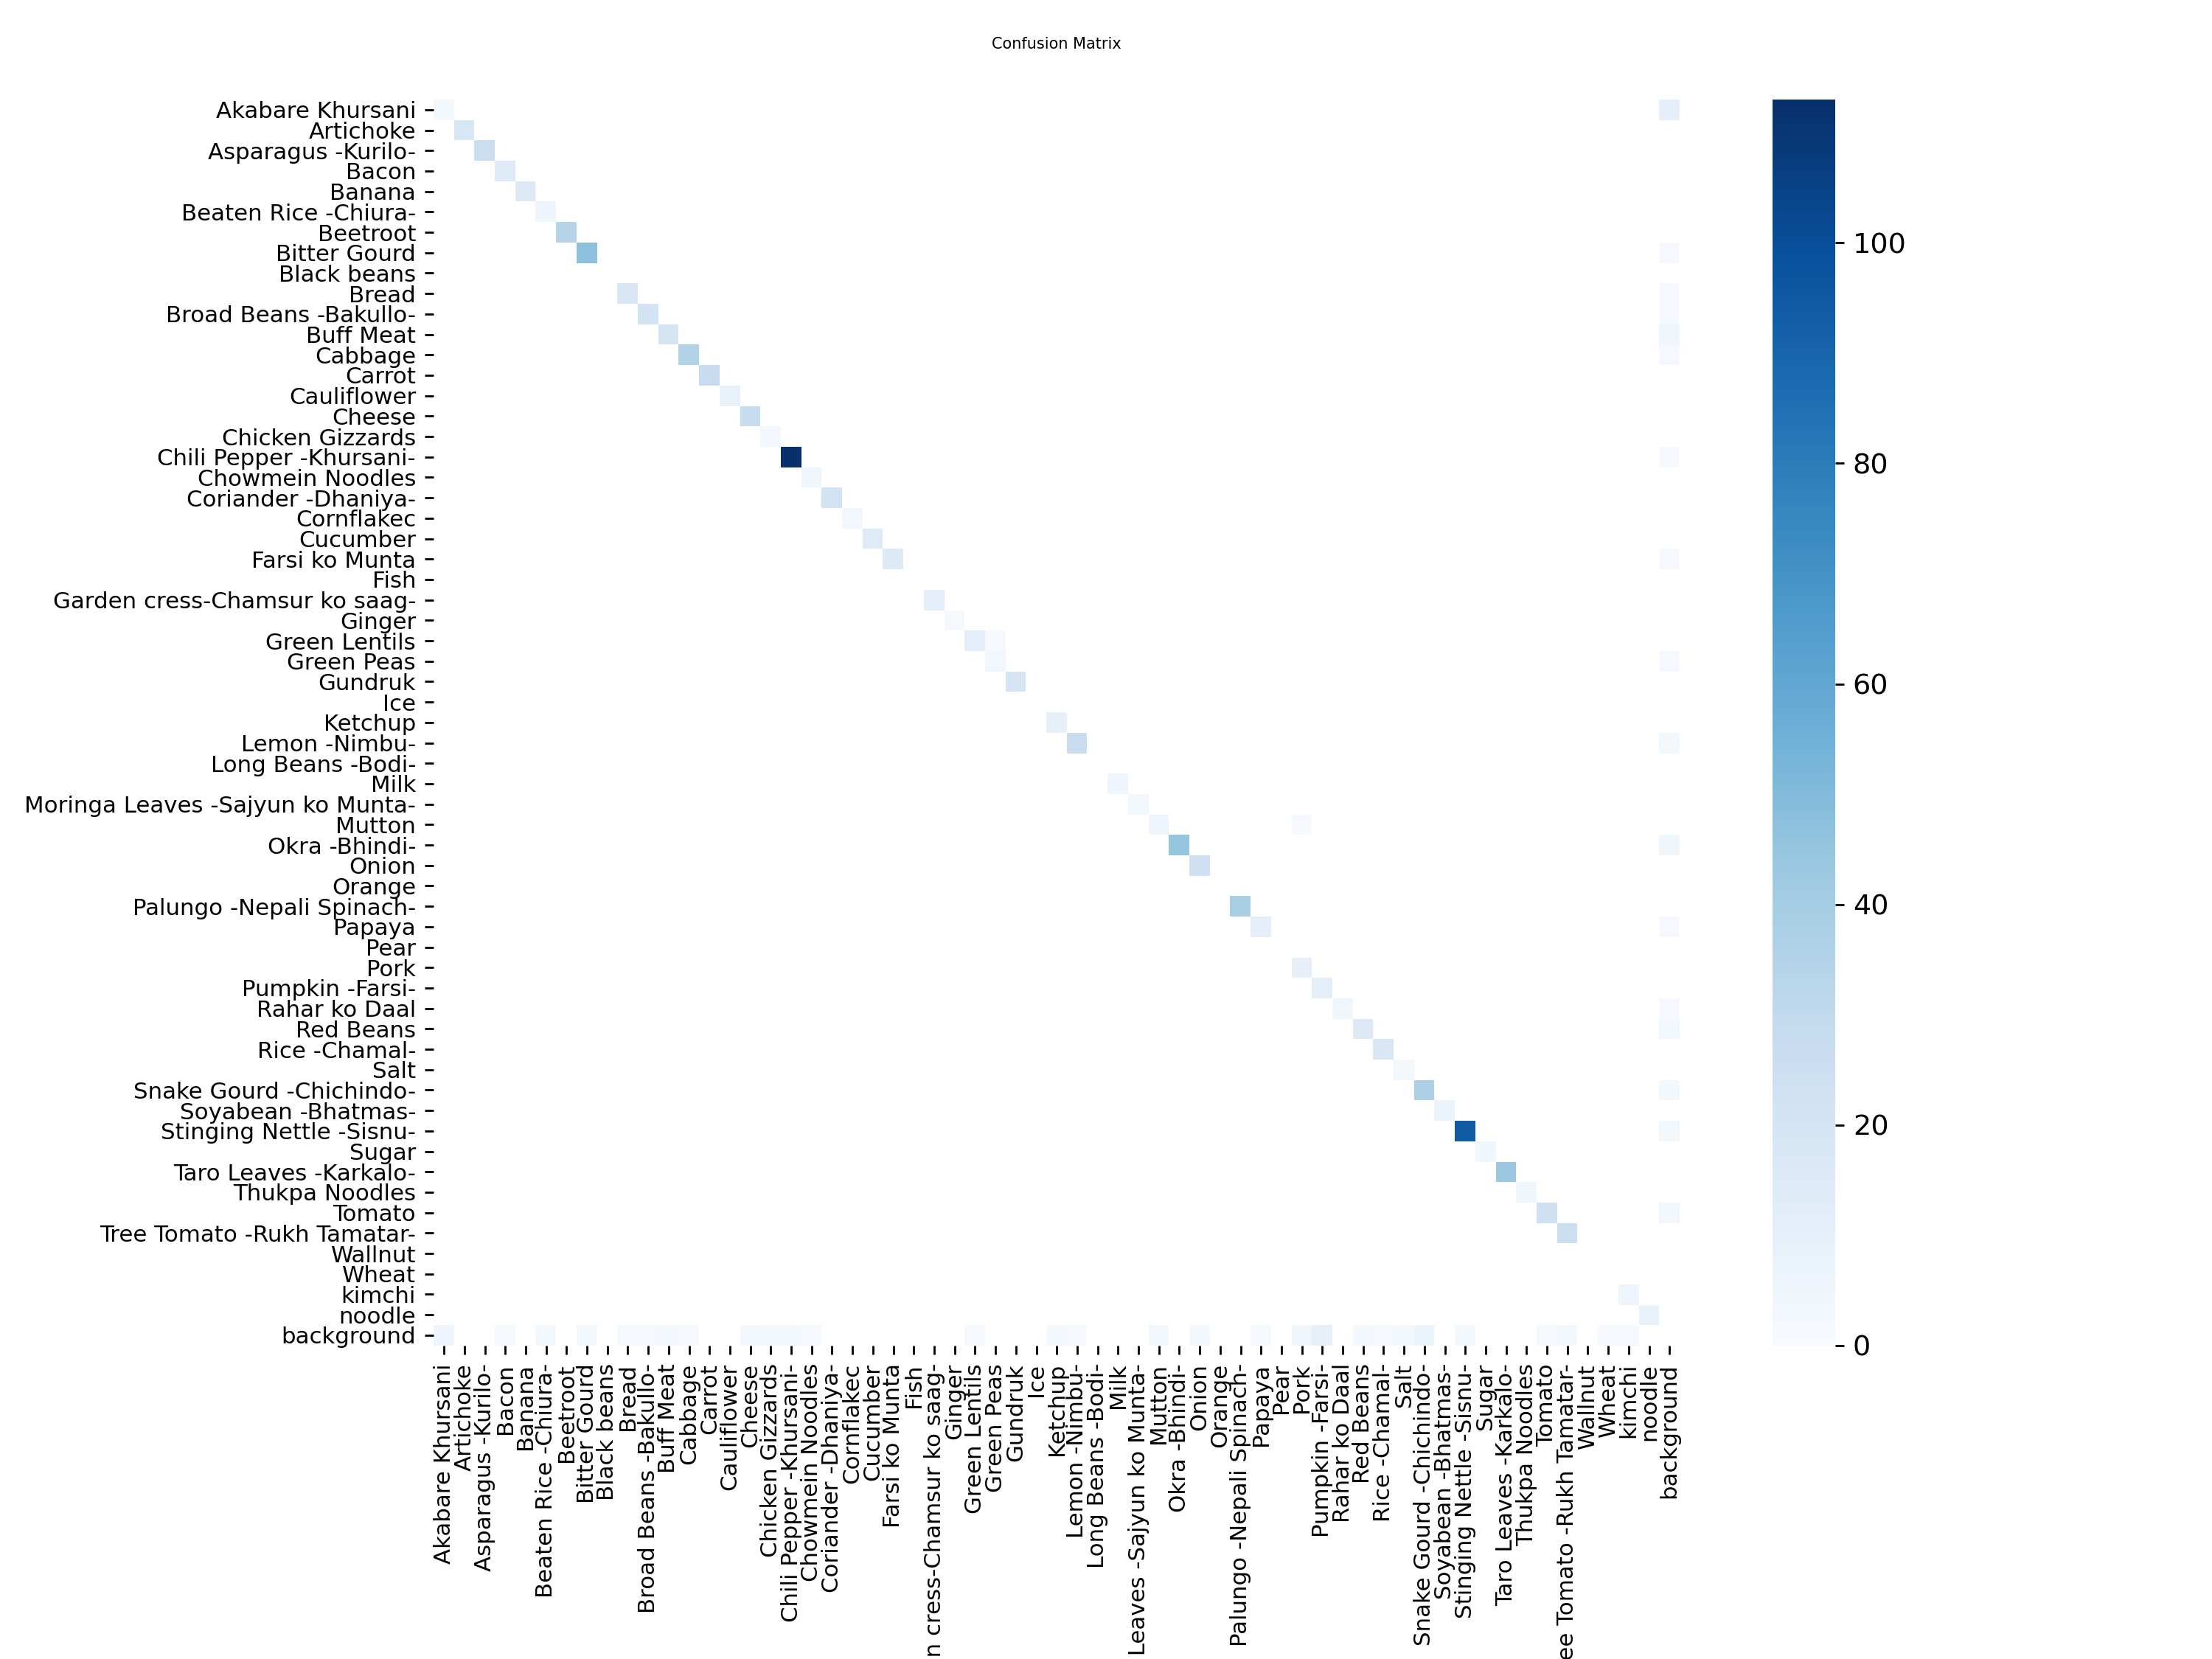

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

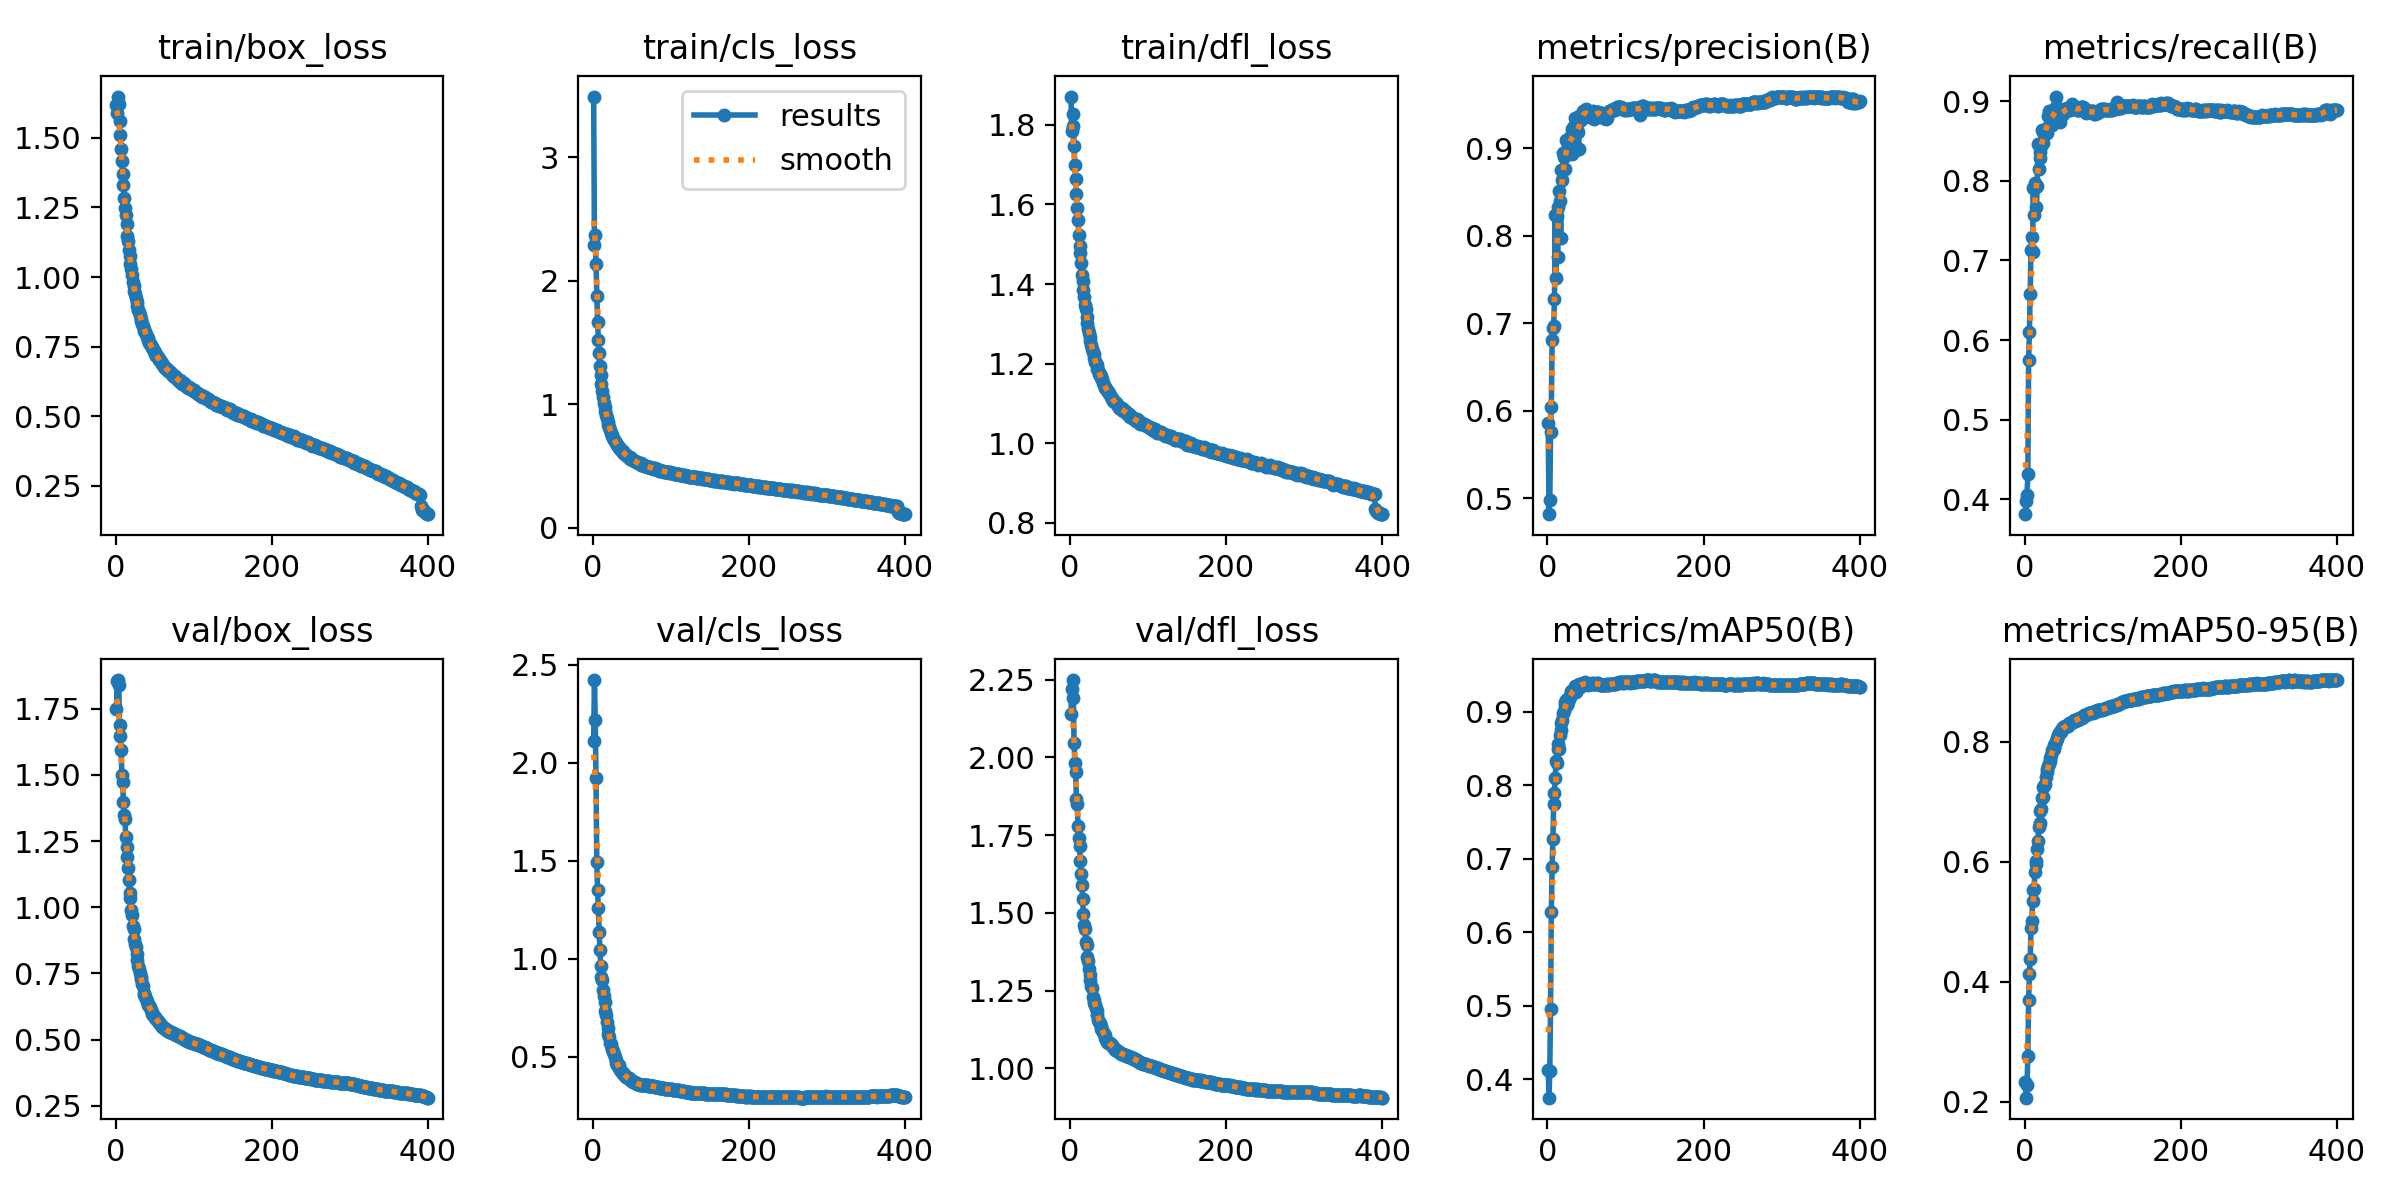

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

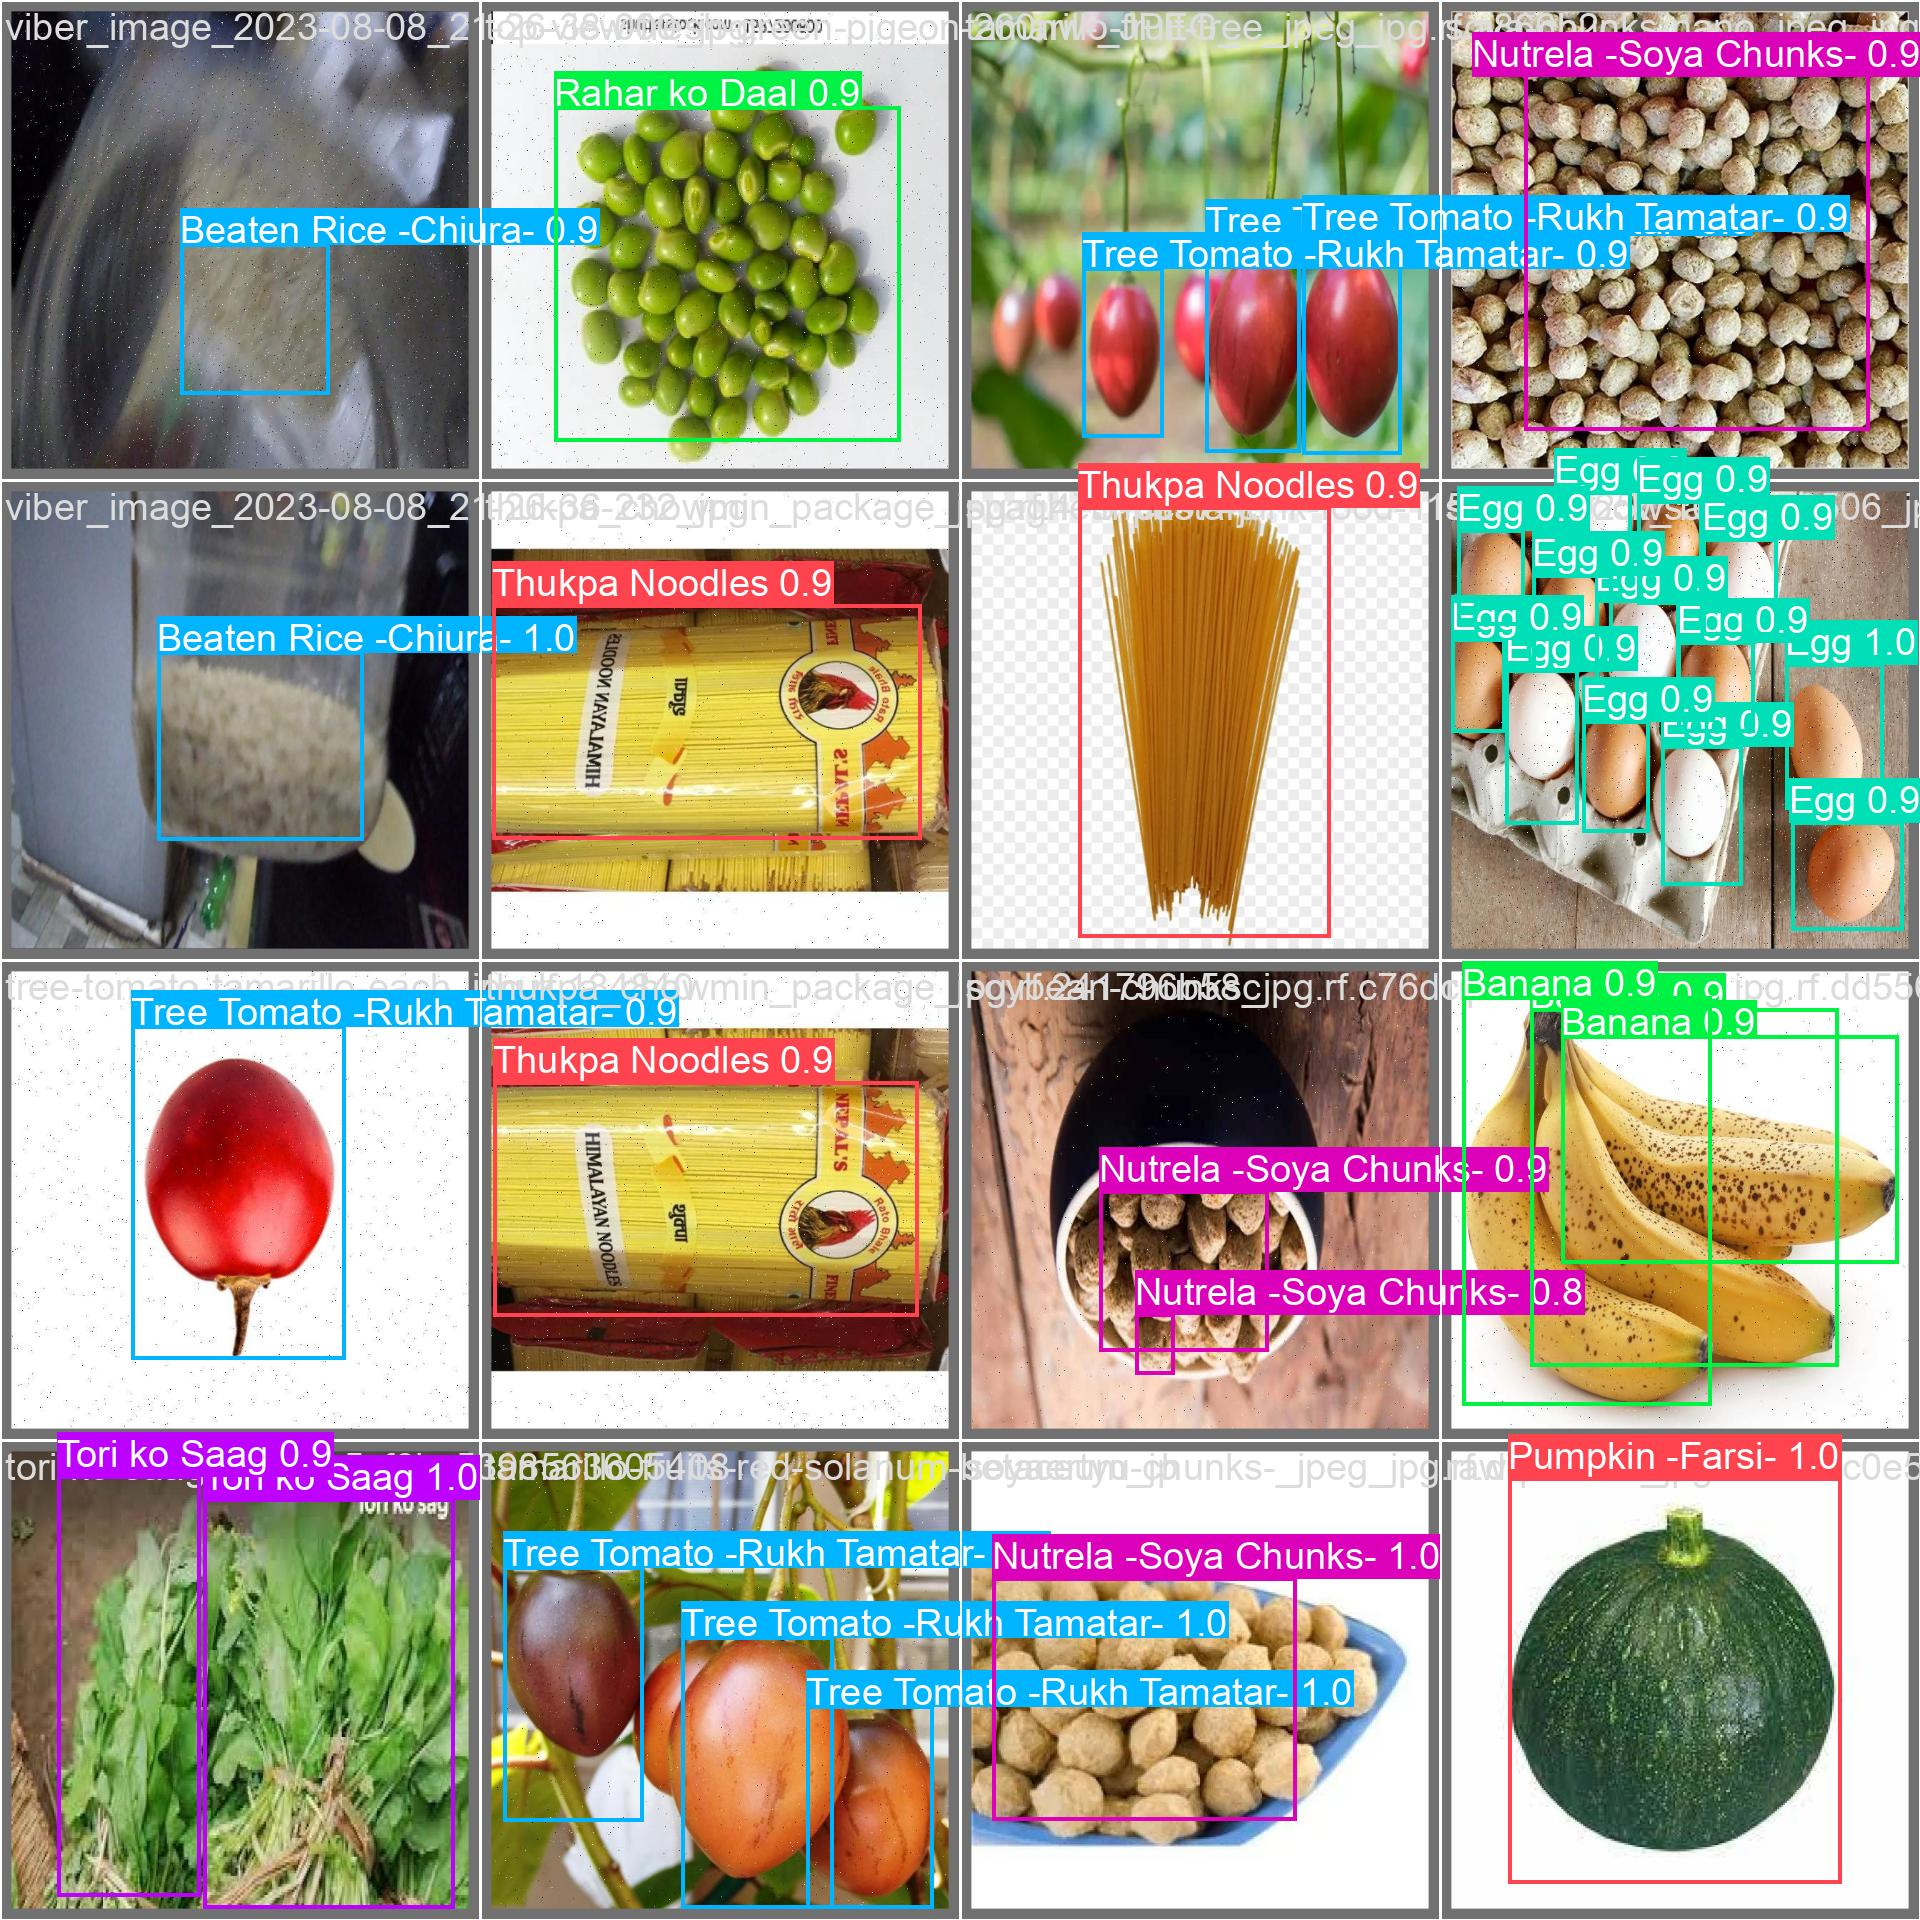

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
HOME

'/home/park/datasets'

In [ ]:
# runs/detect/train/weights/best.pt
!yolo task=detect mode=val model=/home/park/datasets/runs/detect/train/weights/best.pt data=/home/park/datasets/FOOD-INGREDIENTS-detection-1/data.yaml
#!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.174 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 23994MiB)
YOLOv12s summary (fused): 159 layers, 9,277,320 parameters, 0 gradients, 21.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5106.1±703.0 MB/s, size: 79.7 KB)
val: Scanning /home/park/datasets/FOOD-INGREDIENTS-detection-1/valid/labels.cach
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 121, len(boxes) = 2490. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1029       2490      0.956      0.885      0.937      0.903
      Akabare Khursani          1          7      0.164      0.286      0.119     0.0214
             Artichoke         11         18          1      0.959      0.995      0.989
  Ash Gourd -Kubhindo-         

## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.57 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 23994MiB)
YOLO11n summary (fused): 238 layers, 2,653,648 parameters, 0 gradients, 6.7 GFLOPs

image 1/827 /home/park/datasets/FOOD-INGREDIENTS-detection-1/test/images/-100_jpg.rf.ff37da80efdbfbe3cd0b8ed176a5e030.jpg: 640x640 3 Sweet Potato -Suthuni-s, 5.6ms
image 2/827 /home/park/datasets/FOOD-INGREDIENTS-detection-1/test/images/-105_jpg.rf.24c4b95e262a32db4cae88d55296de81.jpg: 640x640 1 Bacon, 5.5ms
image 3/827 /home/park/datasets/FOOD-INGREDIENTS-detection-1/test/images/-106_jpg.rf.11f29bcd89c5ed8d6ca8f897dd67329d.jpg: 640x640 1 Sweet Potato -Suthuni-, 4.8ms
image 4/827 /home/park/datasets/FOOD-INGREDIENTS-detection-1/test/images/-106_jpg.rf.a224f98f240b1f5b92c95065fb03d210.jpg: 640x640 3 Mushrooms, 4.7ms
image 5/827 /home/park/datasets/FOOD-INGREDIENTS-detection-1/test/images/-106_jpg.rf.cd1fabe74a21a61292c7226ad713d97b.jpg: 640x640 2 Mushrooms, 4.7ms
image 6/827 /home/park/datasets/FOOD-INGREDIEN

**NOTE:** Let's take a look at few results.

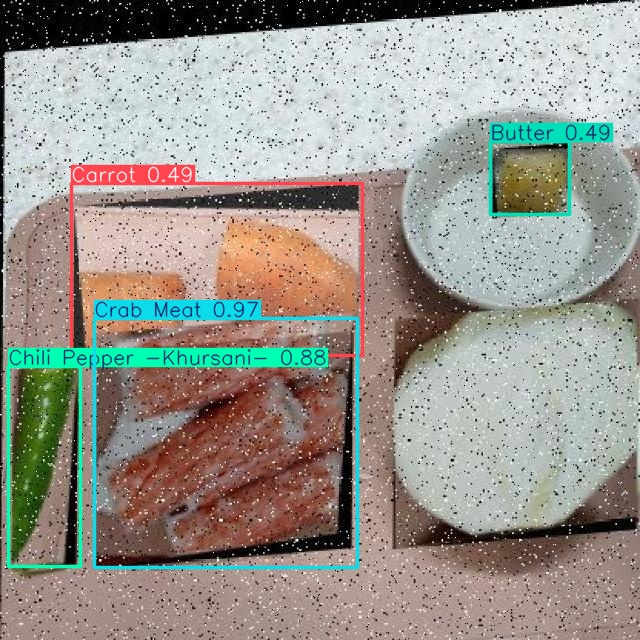

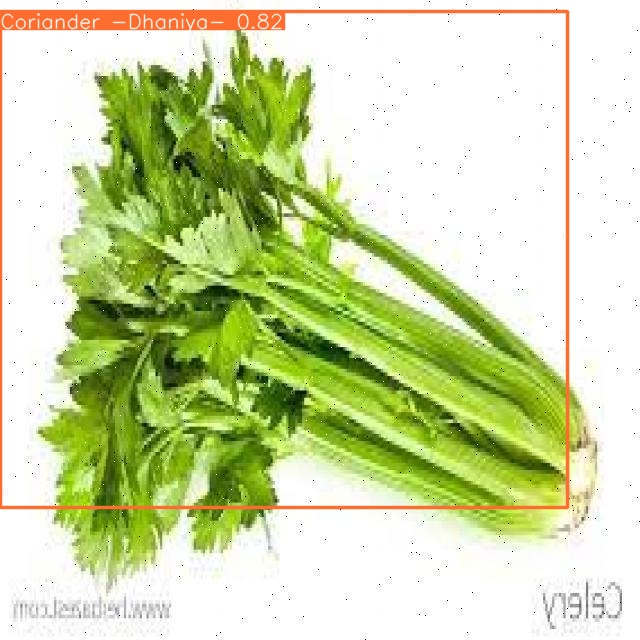

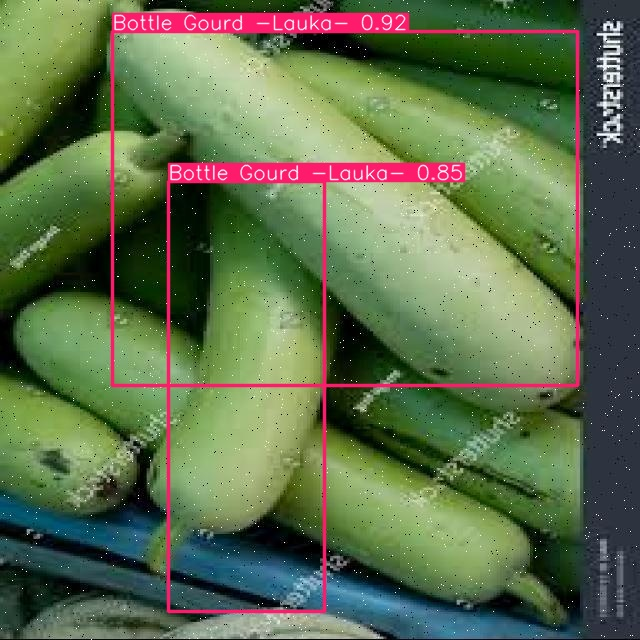

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
# 새로운 이미지에 대한 예측 (mode=predict)

# `best.pt` 모델로 새로운 이미지에 대해 예측하는 코드
# mode=predict: '예측' 모드로 실행
# source=: 예측할 이미지 파일의 경로
# save=True: 예측 결과를 이미지 파일로 저장

image_folder_path = "/content"

!yolo task=detect mode=predict model="/content/best.pt" source={image_folder_path} save=True

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,277,320 parameters, 0 gradients, 21.5 GFLOPs

image 1/5 /content/01.png: 512x640 3 Eggs, 51.6ms
image 2/5 /content/04.png: 544x640 1 Banana, 54.5ms
image 3/5 /content/05.png: 576x640 2 Bananas, 53.0ms
image 4/5 /content/06.png: 576x640 (no detections), 19.9ms
image 5/5 /content/07.png: 640x608 (no detections), 53.6ms
Speed: 5.3ms preprocess, 46.5ms inference, 61.9ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# 새로운 이미지에 대한 예측 (mode=predict)

# `best.pt` 모델로 새로운 이미지에 대해 예측하는 코드
# mode=predict: '예측' 모드로 실행
# source=: 예측할 이미지 파일의 경로
# save=True: 예측 결과를 이미지 파일로 저장

image_folder_path = "/content"

!yolo task=detect mode=predict model="/best.pt" source={image_folder_path} save=True

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,277,320 parameters, 0 gradients, 21.5 GFLOPs

image 1/13 /content/2-1.png: 416x640 1 Palungo -Nepali Spinach-, 50.8ms
image 2/13 /content/2-2.png: 384x640 (no detections), 52.9ms
image 3/13 /content/2-3.png: 640x512 (no detections), 51.4ms
image 4/13 /content/2-4.png: 640x608 (no detections), 52.1ms
image 5/13 /content/스크린샷 2025-08-07 133604.png: 544x640 1 Chili Pepper -Khursani-, 54.8ms
image 6/13 /content/스크린샷 2025-08-07 133841.png: 480x640 (no detections), 50.5ms
image 7/13 /content/스크린샷 2025-08-07 134026.png: 256x640 (no detections), 50.3ms
image 8/13 /content/스크린샷 2025-08-07 153446.png: 576x640 (no detections), 53.2ms
image 9/13 /content/스크린샷 2025-08-07 170523.png: 416x640 1 Lemon -Nimbu-, 15.5ms
image 10/13 /content/스크린샷 2025-08-07 170535.png: 576x640 1 Sweet Potato -Suthuni-, 20.4ms
image 11/13 /content/스크린샷 2025-08-07 170605.png: 512x640 (no detections), 48

## Deploy model on Roboflow

Once you have finished training your YOLOv11 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv11 weights.

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
!pip install inference

In [ ]:
import os, random, cv2
import supervision as sv
import IPython
import inference

model_id = project.id.split("/")[1] + "/" + dataset.version
model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image, confidence=0.4, overlap=30)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = box_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!unzip /content/view?usp=sharing